In [1]:
%matplotlib inline

In [3]:
from pprint import pprint
import pandas as pd
import numpy as np
import seaborn
seaborn.set()
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import fetch_20newsgroups

In [4]:
# get the data
newsgroups = fetch_20newsgroups()

In [5]:
# 11K docs
len(newsgroups.data)

11314

In [6]:
dir(newsgroups)

['__class__',
 '__cmp__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'has_key',
 'items',
 'iteritems',
 'iterkeys',
 'itervalues',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values',
 'viewitems',
 'viewkeys',
 'viewvalues']

In [7]:
df = pd.DataFrame(newsgroups.data, columns=['data'])

In [8]:
df['target'] = newsgroups.target

In [9]:
df['target_name'] = df['target'].apply(lambda x: newsgroups.target_names[x])

In [10]:
df.head()

,data,target,target_name
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,comp.graphics
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


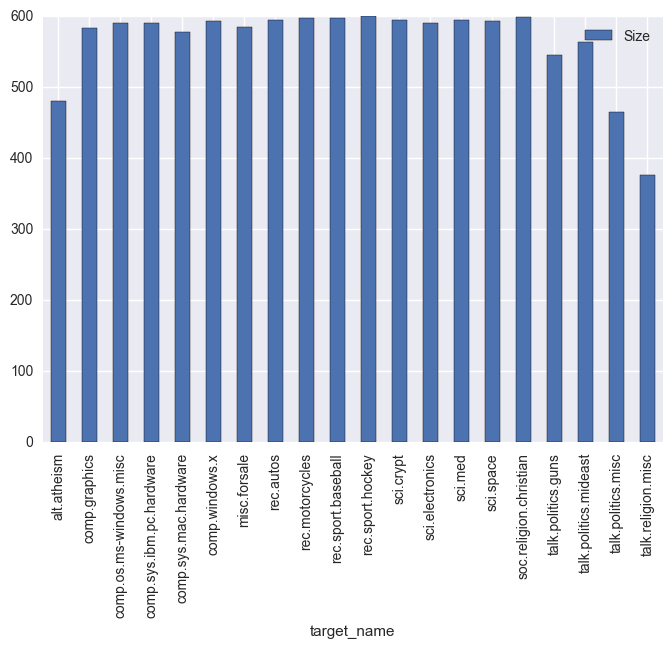

In [11]:
df.groupby(df.target_name).size().reset_index(name='Size').plot(x='target_name', y='Size', kind='bar')
# distribution is approximately the same

In [12]:
def get_cloud(text, mapping=False):
    if mapping is True:
        wordcloud = WordCloud(max_font_size=40).generate_from_frequencies(text.items())
    else:
        wordcloud = WordCloud(max_font_size=40).generate(text)
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [13]:
for tn in df.target_name.unique():
    print(tn)
    text = ""
    for d in df[df.target_name == tn].iterrows():
        text += d[1].data
    get_cloud(text)
    break

rec.autos


In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')

In [20]:
vectors = vectorizer.fit_transform(newsgroups.data)

rec.autos


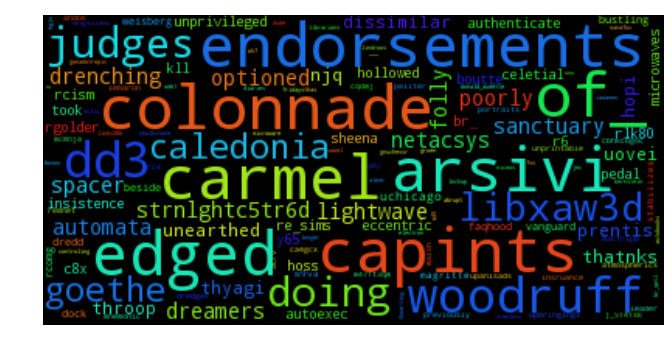

In [76]:
for tn in df.target_name.unique():
    print tn
    text = ""
    for d in df[df.target_name==tn].iterrows():
        text += d[1].data
    tf_idf = vectorizer.transform([text])
    scores = {}
    for col in tf_idf.nonzero()[1]:
        if feature_names[col] not in scores:
            scores[feature_names[col]] = 0
        scores[feature_names[col]] += tf_idf[0, col]
    get_cloud(scores, mapping=True)
    break

In [20]:
newsgroups = fetch_20newsgroups(subset='all', remove=['headers', 'footers', 'quotes'])

rec.autos


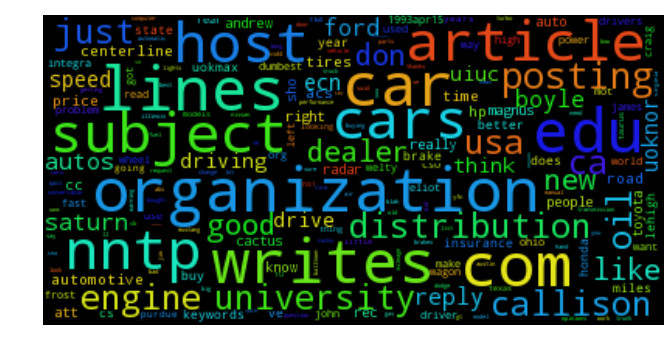

In [119]:
vectorizer = TfidfVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(newsgroups.data)
feature_names = vectorizer.get_feature_names()
for tn in df.target_name.unique():
    print tn
    text = ""
    for d in df[df.target_name==tn].iterrows():
        text += d[1].data
    tf_idf = vectorizer.transform([text])
    scores = {}
    for col in tf_idf.nonzero()[1]:
        if feature_names[col] not in scores:
            scores[feature_names[col]] = 0
        scores[feature_names[col]] += tf_idf[0, col]
    get_cloud(scores, mapping=True)
    break

In [89]:
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test',
                                      remove=('headers', 'footers', 'quotes'))

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score, classification_report, confusion_matrix

macro f1: 0.678760126749
                          precision    recall  f1-score   support

             alt.atheism       0.50      0.48      0.49       319
           comp.graphics       0.66      0.70      0.68       389
 comp.os.ms-windows.misc       0.64      0.62      0.63       394
comp.sys.ibm.pc.hardware       0.65      0.65      0.65       392
   comp.sys.mac.hardware       0.75      0.69      0.72       385
          comp.windows.x       0.83      0.69      0.75       395
            misc.forsale       0.79      0.80      0.79       390
               rec.autos       0.72      0.71      0.71       396
         rec.motorcycles       0.78      0.77      0.78       398
      rec.sport.baseball       0.54      0.82      0.65       397
        rec.sport.hockey       0.89      0.86      0.88       399
               sci.crypt       0.83      0.69      0.76       396
         sci.electronics       0.61      0.60      0.60       393
                 sci.med       0.78      0.76     

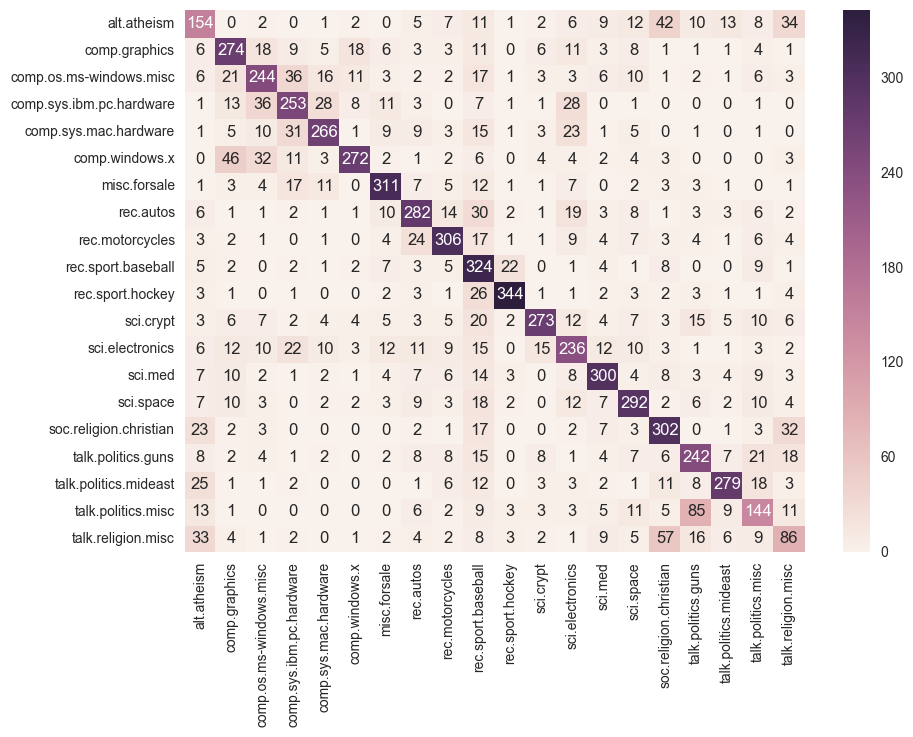

In [107]:
model = make_pipeline(
        TfidfVectorizer(),
        LogisticRegression(C=10, class_weight='balanced'),
    ).fit(newsgroups_train.data, newsgroups_train.target)
prediction = model.predict(newsgroups_test.data)

print 'macro f1:', f1_score(newsgroups_test.target, prediction, average='macro')
print(classification_report(newsgroups_test.target, prediction, target_names=newsgroups_test.target_names))
cm = confusion_matrix(newsgroups_test.target, prediction)
df_cm = pd.DataFrame(cm, index = newsgroups_test.target_names, columns=newsgroups_test.target_names)
plt.figure(figsize = (10,7))
seaborn.heatmap(df_cm, annot=True,fmt='g')

macro f1: 0.419306719787
                          precision    recall  f1-score   support

             alt.atheism       0.21      0.32      0.26       319
           comp.graphics       0.32      0.47      0.38       389
 comp.os.ms-windows.misc       0.34      0.47      0.40       394
comp.sys.ibm.pc.hardware       0.35      0.40      0.37       392
   comp.sys.mac.hardware       0.39      0.45      0.42       385
          comp.windows.x       0.49      0.48      0.48       395
            misc.forsale       0.59      0.64      0.61       390
               rec.autos       0.28      0.47      0.35       396
         rec.motorcycles       0.50      0.52      0.51       398
      rec.sport.baseball       0.48      0.58      0.53       397
        rec.sport.hockey       0.61      0.58      0.59       399
               sci.crypt       0.59      0.49      0.54       396
         sci.electronics       0.32      0.20      0.24       393
                 sci.med       0.53      0.36     

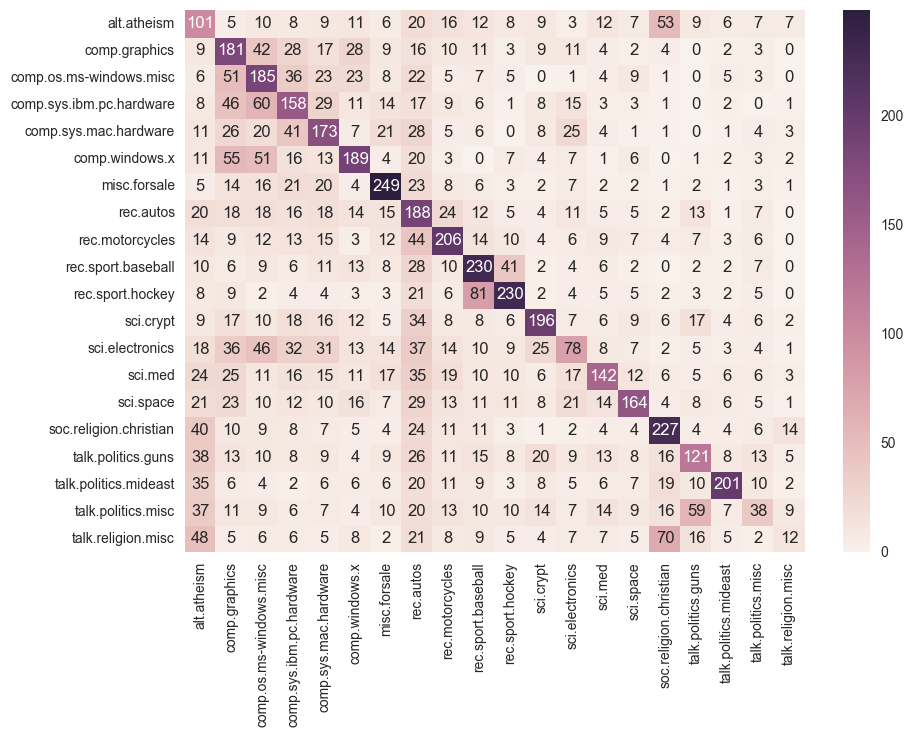

In [112]:
model = make_pipeline(
        TfidfVectorizer(),
        RandomForestClassifier(),
    ).fit(newsgroups_train.data, newsgroups_train.target)
prediction = model.predict(newsgroups_test.data)

print 'macro f1:', f1_score(newsgroups_test.target, prediction, average='macro')
print(classification_report(newsgroups_test.target, prediction, target_names=newsgroups_test.target_names))
cm = confusion_matrix(newsgroups_test.target, prediction)
df_cm = pd.DataFrame(cm, index = newsgroups_test.target_names, columns=newsgroups_test.target_names)
plt.figure(figsize = (10,7))
seaborn.heatmap(df_cm, annot=True,fmt='g')

macro f1: 0.518825247045
                          precision    recall  f1-score   support

             alt.atheism       0.37      0.35      0.36       319
           comp.graphics       0.46      0.56      0.50       389
 comp.os.ms-windows.misc       0.48      0.54      0.51       394
comp.sys.ibm.pc.hardware       0.45      0.45      0.45       392
   comp.sys.mac.hardware       0.51      0.56      0.53       385
          comp.windows.x       0.55      0.59      0.57       395
            misc.forsale       0.66      0.62      0.64       390
               rec.autos       0.36      0.63      0.46       396
         rec.motorcycles       0.61      0.59      0.60       398
      rec.sport.baseball       0.58      0.67      0.62       397
        rec.sport.hockey       0.74      0.73      0.74       399
               sci.crypt       0.69      0.62      0.65       396
         sci.electronics       0.43      0.32      0.37       393
                 sci.med       0.62      0.50     

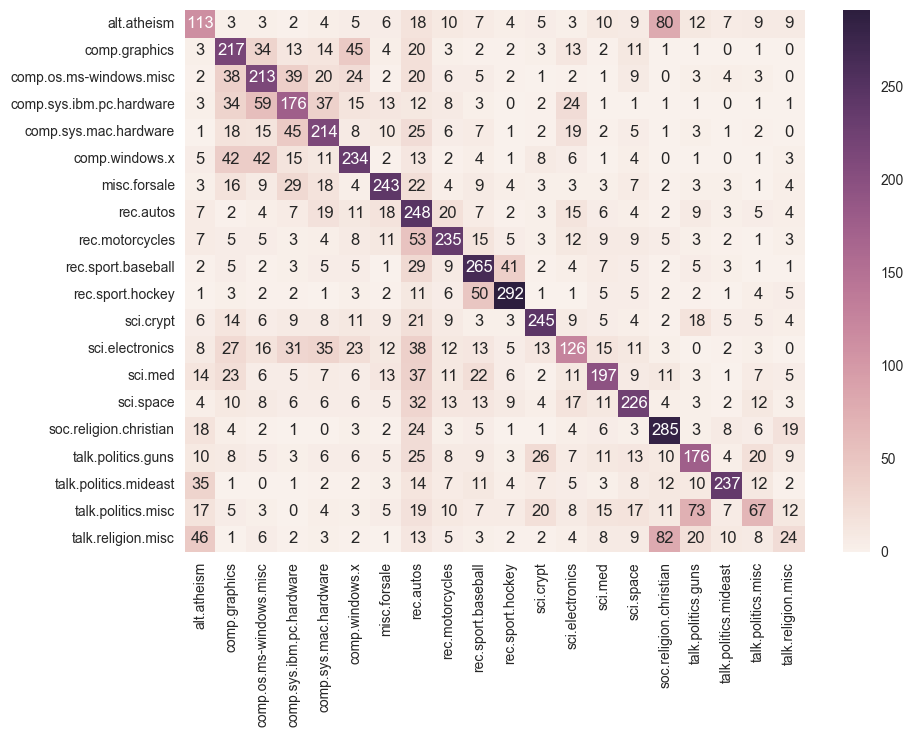

In [113]:
model = make_pipeline(
        TfidfVectorizer(min_df=5, stop_words='english'),
        RandomForestClassifier(),
    ).fit(newsgroups_train.data, newsgroups_train.target)
prediction = model.predict(newsgroups_test.data)

print 'macro f1:', f1_score(newsgroups_test.target, prediction, average='macro')
print(classification_report(newsgroups_test.target, prediction, target_names=newsgroups_test.target_names))
cm = confusion_matrix(newsgroups_test.target, prediction)
df_cm = pd.DataFrame(cm, index = newsgroups_test.target_names, columns=newsgroups_test.target_names)
plt.figure(figsize = (10,7))
seaborn.heatmap(df_cm, annot=True,fmt='g')

macro f1: 0.56428306269
                          precision    recall  f1-score   support

             alt.atheism       0.39      0.39      0.39       319
           comp.graphics       0.55      0.59      0.57       389
 comp.os.ms-windows.misc       0.53      0.57      0.55       394
comp.sys.ibm.pc.hardware       0.49      0.51      0.50       392
   comp.sys.mac.hardware       0.63      0.60      0.61       385
          comp.windows.x       0.65      0.60      0.63       395
            misc.forsale       0.69      0.71      0.70       390
               rec.autos       0.41      0.65      0.50       396
         rec.motorcycles       0.60      0.65      0.62       398
      rec.sport.baseball       0.71      0.68      0.69       397
        rec.sport.hockey       0.77      0.77      0.77       399
               sci.crypt       0.72      0.63      0.67       396
         sci.electronics       0.50      0.43      0.47       393
                 sci.med       0.66      0.61      

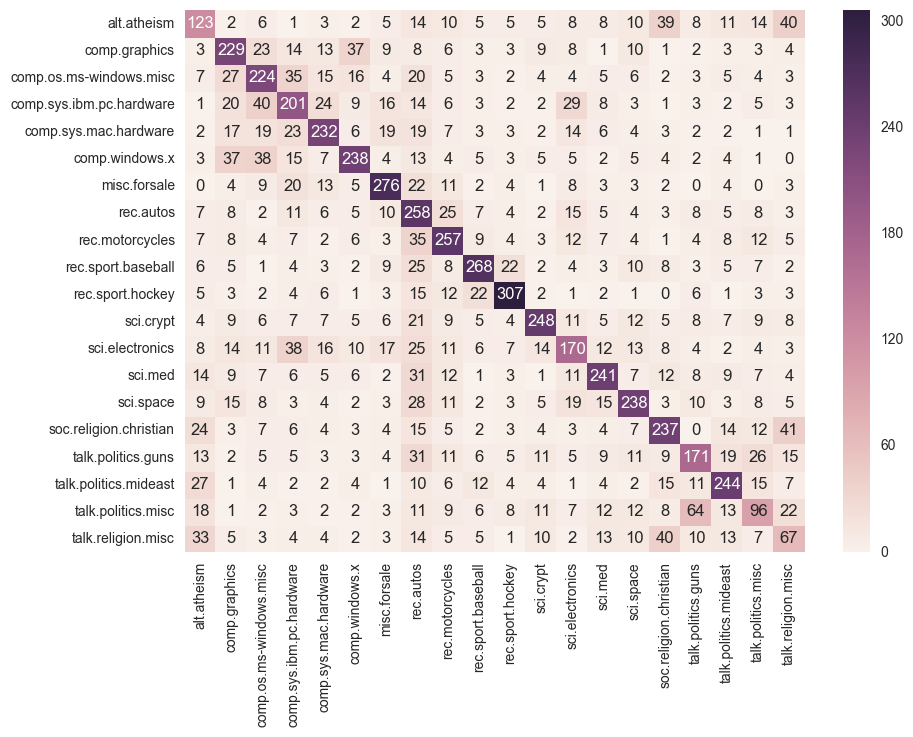

In [116]:
model = make_pipeline(
        CountVectorizer(min_df=5, stop_words='english'),
        LinearSVC(),
    ).fit(newsgroups_train.data, newsgroups_train.target)
prediction = model.predict(newsgroups_test.data)

print 'macro f1:', f1_score(newsgroups_test.target, prediction, average='macro')
print(classification_report(newsgroups_test.target, prediction, target_names=newsgroups_test.target_names))
cm = confusion_matrix(newsgroups_test.target, prediction)
df_cm = pd.DataFrame(cm, index = newsgroups_test.target_names, columns=newsgroups_test.target_names)
plt.figure(figsize = (10,7))
seaborn.heatmap(df_cm, annot=True,fmt='g')

macro f1: 0.66534270344
                          precision    recall  f1-score   support

             alt.atheism       0.53      0.47      0.50       319
           comp.graphics       0.65      0.70      0.68       389
 comp.os.ms-windows.misc       0.59      0.61      0.60       394
comp.sys.ibm.pc.hardware       0.61      0.64      0.62       392
   comp.sys.mac.hardware       0.72      0.68      0.70       385
          comp.windows.x       0.80      0.68      0.74       395
            misc.forsale       0.72      0.77      0.74       390
               rec.autos       0.74      0.69      0.71       396
         rec.motorcycles       0.74      0.73      0.74       398
      rec.sport.baseball       0.54      0.83      0.65       397
        rec.sport.hockey       0.85      0.87      0.86       399
               sci.crypt       0.82      0.70      0.76       396
         sci.electronics       0.62      0.56      0.59       393
                 sci.med       0.79      0.74      

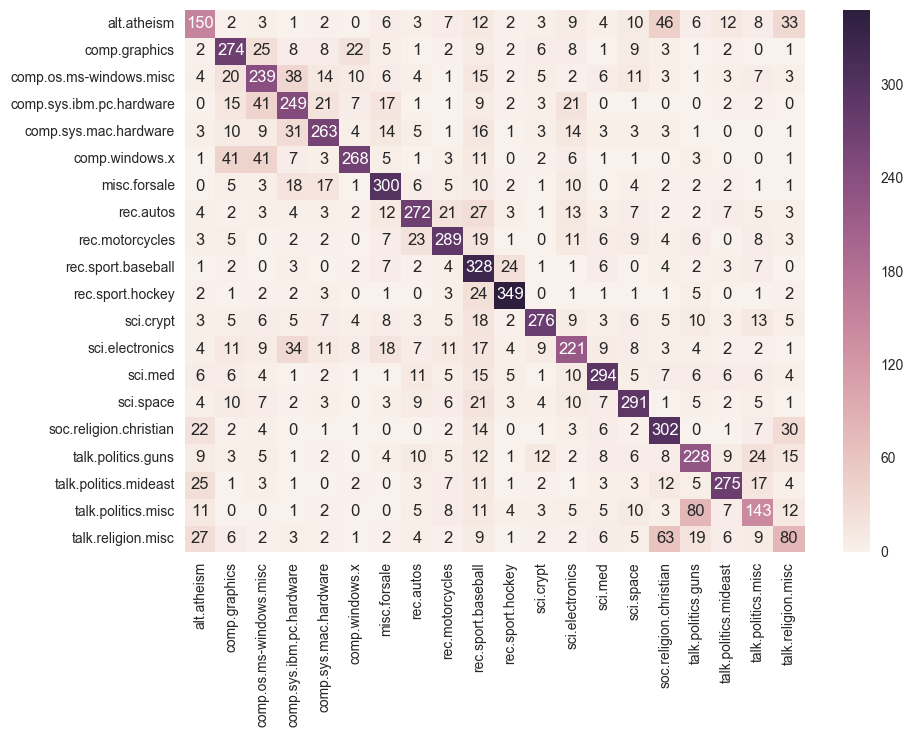

In [117]:
model = make_pipeline(
        TfidfVectorizer(min_df=5, stop_words='english'),
        LinearSVC(),
    ).fit(newsgroups_train.data, newsgroups_train.target)
prediction = model.predict(newsgroups_test.data)

print 'macro f1:', f1_score(newsgroups_test.target, prediction, average='macro')
print(classification_report(newsgroups_test.target, prediction, target_names=newsgroups_test.target_names))
cm = confusion_matrix(newsgroups_test.target, prediction)
df_cm = pd.DataFrame(cm, index = newsgroups_test.target_names, columns=newsgroups_test.target_names)
plt.figure(figsize = (10,7))
seaborn.heatmap(df_cm, annot=True,fmt='g')

In [118]:
# countvectorizer vs tfidf
# stopwords
# stemming
# tfidf -> ngrams [1,2,3]
# models